<a href="https://colab.research.google.com/github/kang-jeong-uk/OSSP/blob/main/Heart_Attack_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np # 행렬, 다차원 배열을 다룰 때 사용
import pandas as pd # 데이터를 다룰 때 사용
import seaborn as sns #matlab을 기반으로 한 시각화
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-dark')

from google.colab import drive
drive.mount('/content/Kaggle_Heart_Attack_data')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/Kaggle_Heart_Attack_data; to attempt to forcibly remount, call drive.mount("/content/Kaggle_Heart_Attack_data", force_remount=True).


In [84]:
# data download : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download

data = pd.read_csv("/content/Kaggle_Heart_Attack_data/MyDrive/Kaggle_Heart_Attack_data/heart.csv")
data.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
display(data.info())
#display(data.describe())
display(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    int64  
 2   cp        284 non-null    int64  
 3   trtbps    284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    int64  
 6   restecg   284 non-null    int64  
 7   thalachh  284 non-null    int64  
 8   exng      284 non-null    int64  
 9   oldpeak   284 non-null    float64
 10  slp       284 non-null    int64  
 11  caa       284 non-null    int64  
 12  thall     284 non-null    int64  
 13  output    284 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 41.4 KB


None

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
output_graph1=px.pie(data, names= "sex",title="sex")
output_graph1.show()
output_graph2=px.pie(data, names= "output",title="Output")
output_graph2.show()

print("Female Value Counts: \n{}".format((data[data ["sex"] == 1].reset_index())['output'].value_counts()))
print("Male Value Counts: \n{}".format((data[data ["sex"] == 0].reset_index())['output'].value_counts()))

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data, hue="output", corner = True)
plt.legend("output")
plt.tight_layout()
plt.plot()

In [ ]:
plt.figure(figsize=(18,6))
sns.displot(data["age"], color="magenta")
plt.title("Total Age distribution")
plt.show()

In [ ]:
ax = px.histogram(data, x="age", color="output", title="Distribution Age and Output")
ax.show()

In [ ]:
X=data[data["sex"]==1].reset_index()  # 여성
Y=data[data["sex"]==0].reset_index()   # 남성

HR=data[data["output"]==1].reset_index()  # Output=1(심장질병에 걸릴 확률이 높은 데이터)
LR=data[data["output"]==0].reset_index()  # Output=0(심장질병에 걸릴 확률이 낮은 데이터)

print("----------------나이 분포------------------")
print("평균: {}".format(round(data["age"].mean())))
print("중앙값: {}".format(round(data["age"].median())))
print("분산: {}".format(round(data["age"].var())))  
print("표준편차: {}\n".format(round((data["age"].std()),3)))


print("--------------성별에 따른 나이 분포-------------------")
print("-남성-")
print("평균: {}".format(round(Y["age"].mean())))
print("중앙값: {}".format(round(Y["age"].median())))
print("분산: {}".format(round(Y["age"].var())))
print("표준편차: {}\n\n".format(round((Y["age"].std()),3)))

print("-여성-")
print("평균: {}".format(round(X["age"].mean())))
print("중앙값: {}".format(round(X["age"].median())))
print("분산: {}".format(round(X["age"].var())))
print("표준편차: {}\n".format(round((X["age"].std()),3)))


print("------------------Output에 따른 나이 분포-----------------------")
print("-심장질병에 걸릴 확률이 높은 나이-")
print("평균: {}".format(round(HR["age"].mean())))
print("중앙: {}".format(round(HR["age"].median())))
print("분산: {}".format(round(HR["age"].var())))
print("표준편차: {}\n\n".format(round((HR["age"].std()),3)))

print("-심장질병에 걸릴 확률이 낮은 나이-")
print("평균: {}".format(round(LR["age"].mean())))
print("중앙값: {}".format(round(LR["age"].median())))
print("분산: {}".format(round(LR["age"].var())))
print("표준편차: {}".format(round((LR["age"].std()),3)))

In [ ]:
# 분류형, 연속형 데이터 나누기
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data[class_cols]

continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data[continuous_cols]


# 분류형 데이터 그래프
for col in class_cols[2:]:
    ax=px.pie(data, names= col, title=col)
    ax.show()


# 연속형 데이터 그래프
continuous = ["age","trtbps","chol","thalachh","oldpeak", "output"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
  for j in range(2):
    sns.distplot(data[continuous[k]], ax = ax1[i][j], color = 'red')
    k +=1

plt.show()

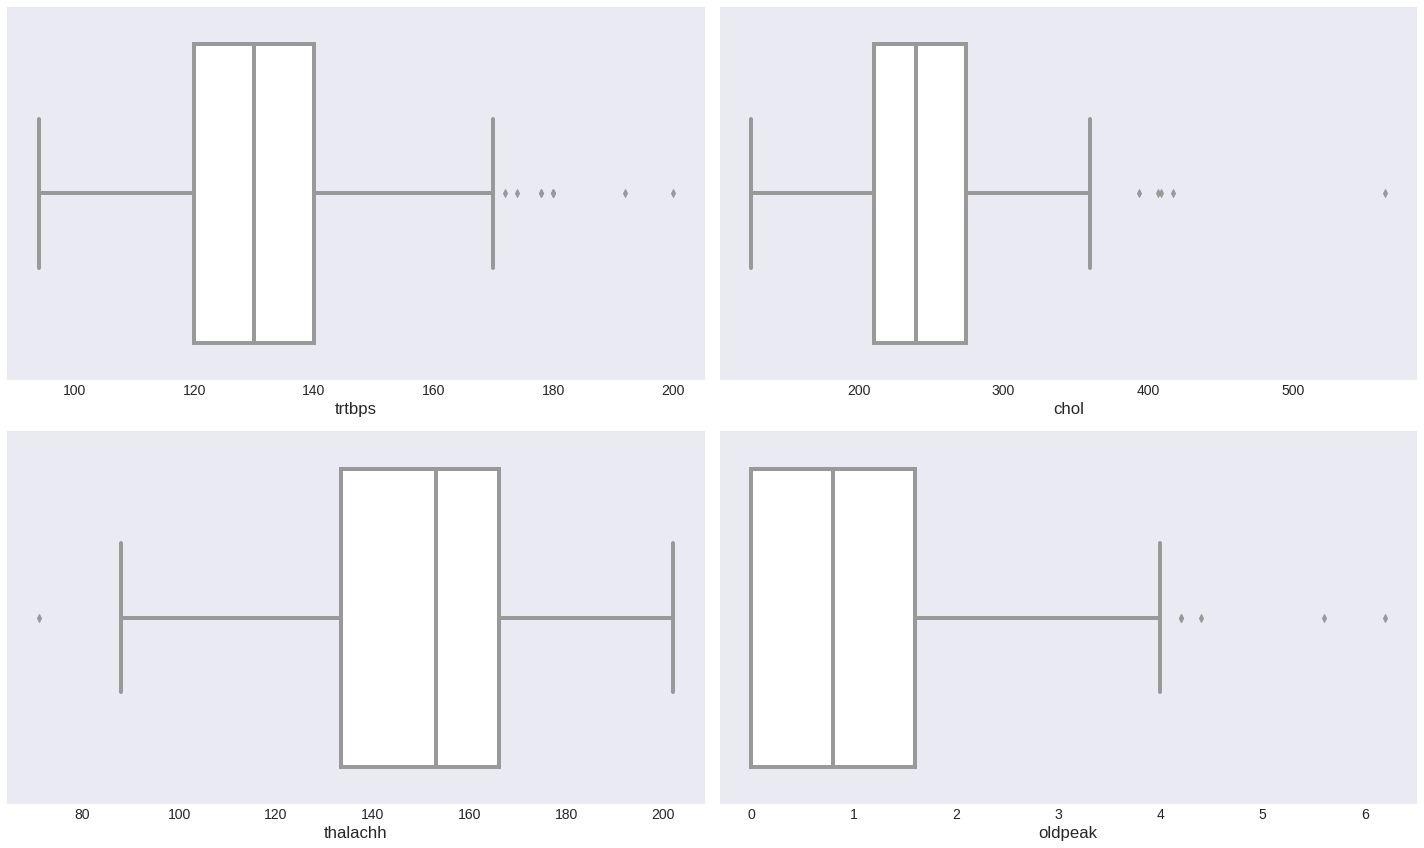

이상치(최댓값 초과) :  4.0
이상치(최솟값 미만) :  -2.4000000000000004
Outliners Present at position: 

trtbps: (array([  8, 101, 110, 203, 223, 241, 248, 260, 266]),)
chol: (array([ 28,  85,  96, 220, 246]),)
thalachh: (array([272]),)
oldpeak: (array([101, 204, 221, 250, 291]),)


In [91]:
# 이상치 판별, 시각화

fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=data,x=data[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

# 이상치 탐색

Q3 = data["oldpeak"].quantile(q=0.75)
Q1 = data["oldpeak"].quantile(q=0.25)
IQR = Q3 - Q1

print("이상치(최댓값 초과) : ",Q3 + IQR*1.5)
print("이상치(최솟값 미만) : ", Q1 - IQR*1.5)


#Display the position of outliners.
print("Outliners Present at position: \n")
print("trtbps: {}".format(np.where(data['trtbps']>170)))
print("chol: {}".format(np.where(data['chol']>369.75)))
print("thalachh: {}".format(np.where(data['thalachh']<84.75)))
print("oldpeak: {}".format(np.where(data['oldpeak']>4)))


Int64Index([8, 101, 110, 203, 223, 241, 248, 260, 266], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([28, 85, 96, 220, 246], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([272], dtype='int64')
Int64Index([101, 204, 221, 250, 291], dtype='int64')
Int64Index([], dtype='int64')


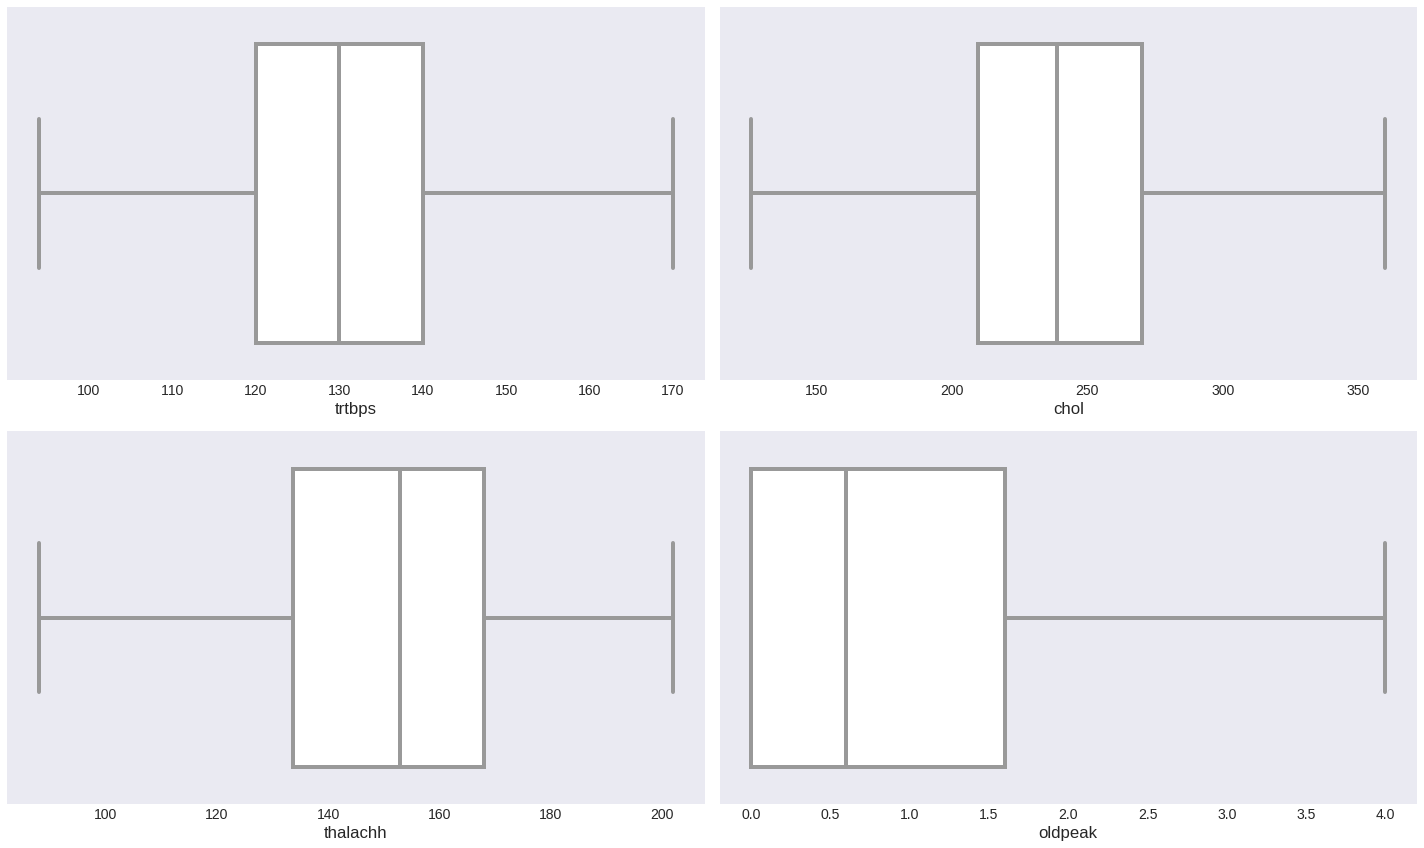

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    int64  
 2   cp        284 non-null    int64  
 3   trtbps    284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    int64  
 6   restecg   284 non-null    int64  
 7   thalachh  284 non-null    int64  
 8   exng      284 non-null    int64  
 9   oldpeak   284 non-null    float64
 10  slp       284 non-null    int64  
 11  caa       284 non-null    int64  
 12  thall     284 non-null    int64  
 13  output    284 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 41.4 KB


None

In [102]:
# 이상치 제거

import copy

continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data[continuous_cols]
Outliner_delete_data = copy.deepcopy(data)

a=1
for a in range(1, 5):
  Q3 = data[continuous_cols[a]].quantile(q=0.75)
  Q1 = data[continuous_cols[a]].quantile(q=0.25)
  IQR = Q3 - Q1
  outliner_max = data[continuous_cols[a]] > Q3 + IQR*1.5  # 이상치(최댓값 초과)
  outliner_min = data[continuous_cols[a]] < Q1 - IQR*1.5  # 이상치(최솟값 미만)
  outliner_max_index = data[outliner_max].index  # 인덱스
  outliner_min_index = data[outliner_min].index  # 인덱스
  
  print(outliner_max_index)
  print(outliner_min_index)
  #print("----------------------------------------------")
  

  Outliner_delete_data.drop(outliner_max_index, inplace=True, errors='ignore')
  Outliner_delete_data.drop(outliner_min_index, inplace=True, errors='ignore')


fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=Outliner_delete_data,x=Outliner_delete_data[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

display(Outliner_delete_data.info())

In [61]:
X=Outliner_delete_data.iloc[:,:13]
print(X)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
5     57    1   0     140   192    0        1       148     0      0.4    1   
6     56    0   1     140   294    0        0       153     0      1.3    1   
7     44    1   1     120   263    0        1       173     0      0.0    2   
9     57    1   2     150   168    0        1       174     0      1.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
5      0      1